## Практика .Статистические тесты в контексте EDA.
### "Исследование данных  HR - агенства"

### Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания планирует провести исследование изменений в зарплатах в области Data Science за период с 2020 по 2022 год и сделать соответствующие выводы.



Для достижения этой цели необходимо разрешить вопросы:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

* А также ответить на ключевые вопросы HR-агентства:

 - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

 - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
 
 - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

 - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
 
* Если обнаружаться в данных интересные закономерности, также отметить  их в этом анализе.

Для подтверждения  рассуждений и выводов  планируем использовать визуализации и провести статистическое тестирование с целью определить статистическую значимость полученных результатов.

* По условиям задачи нужно продемонстрировать  использование разных тестов для проверки статистической значимости сделанных выводов:
 - тесты для количественного признака:
 - для одной выборки;
 - для двух выборок;
 - для нескольких выборок;
 - тест для категориальных признаков.
 
 ### Ответить на эти вопросы  нам помогут данные HR

####  Описание данных (признаки)

- work_year - Год в котором была выплачена зарплата;
- experience_level - Опыт работы на этой должности в течение года;
- со следующими   возможными значениями:

EN - Entry-level/Junior;
MI - Mid-level/Intermediate;
SE - Senior-level/Expert;
EX - Executive-level/Director.

-  employment_type - Тип трудоустройства для этой роли:

PT — неполный рабочий день;
FT — полный рабочий день;
CT — контракт;
FL — фриланс.

- job_title - Роль, в которой соискатель работал в течение года;
- salary - Общая выплаченная валовая сумма заработной платы;
- salary_currency - Валюта выплачиваемой заработной платы виде кода валюты ISO 4217;                   - salary_in_usd - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);

- employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода        страны ISO 3166;
- remote_ratio - Общий объём работы, выполняемой удалённо;
- Возможные значения:

0 — удалённой работы нет (менее 20 %);
50 — частично удалённая работа;
100 — полностью удалённая работа (более 80 %).

- company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166;
- company_size - Среднее количество людей, работавших в компании в течение года:

S — менее 50 сотрудников (небольшая компания);
M — от 50 до 250 сотрудников (средняя компания);
L — более 250 сотрудников (крупная компания).

###### Оригинальный датасет: ["Data Science Job Salaries" (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)



## Загрузка данных

In [1]:
# загружаем необходимые модули
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook")
sns.set_palette("Set2")


 

In [2]:
# загружаем данные из файла CSV и сохраняем данные в дата-фрэйме(переменную df)
df = pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
# проверяем, что данные загрузились - выводим первые несколько строк  таблицы
df.head(5)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# задаём уровень значимости
alpha = 0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))


 

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [5]:
# обьем данных (строк и столбцов - объектов и признаков)
df.shape


(607, 12)

In [6]:
# выводим типы данных
df.dtypes


Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
# имена колонок в виде списка
#df.columns

# проверим на пропуски , проведем для всех колонок
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))


Кол-во пропусков в колонке Unnamed: 0 = 0
Кол-во пропусков в колонке work_year = 0
Кол-во пропусков в колонке experience_level = 0
Кол-во пропусков в колонке employment_type = 0
Кол-во пропусков в колонке job_title = 0
Кол-во пропусков в колонке salary = 0
Кол-во пропусков в колонке salary_currency = 0
Кол-во пропусков в колонке salary_in_usd = 0
Кол-во пропусков в колонке employee_residence = 0
Кол-во пропусков в колонке remote_ratio = 0
Кол-во пропусков в колонке company_location = 0
Кол-во пропусков в колонке company_size = 0


In [9]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
print('Количество дубликатов: {}'.format(df[df.duplicated()].shape[0]))

# Удаляем дубликаты:
df = df.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(df.shape))


Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


In [11]:
# выведем описательную статистику  

display(df.describe(include=['object']))
df.describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## Визуальный анализ

###### Визуальный анализ графиков помогает нам интерпретировать данные и  делать предварительные выводы о взаимосвязях между переменными.


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'work_year'}>],
       [<Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'salary_in_usd'}>],
       [<Axes: title={'center': 'remote_ratio'}>, <Axes: >]], dtype=object)

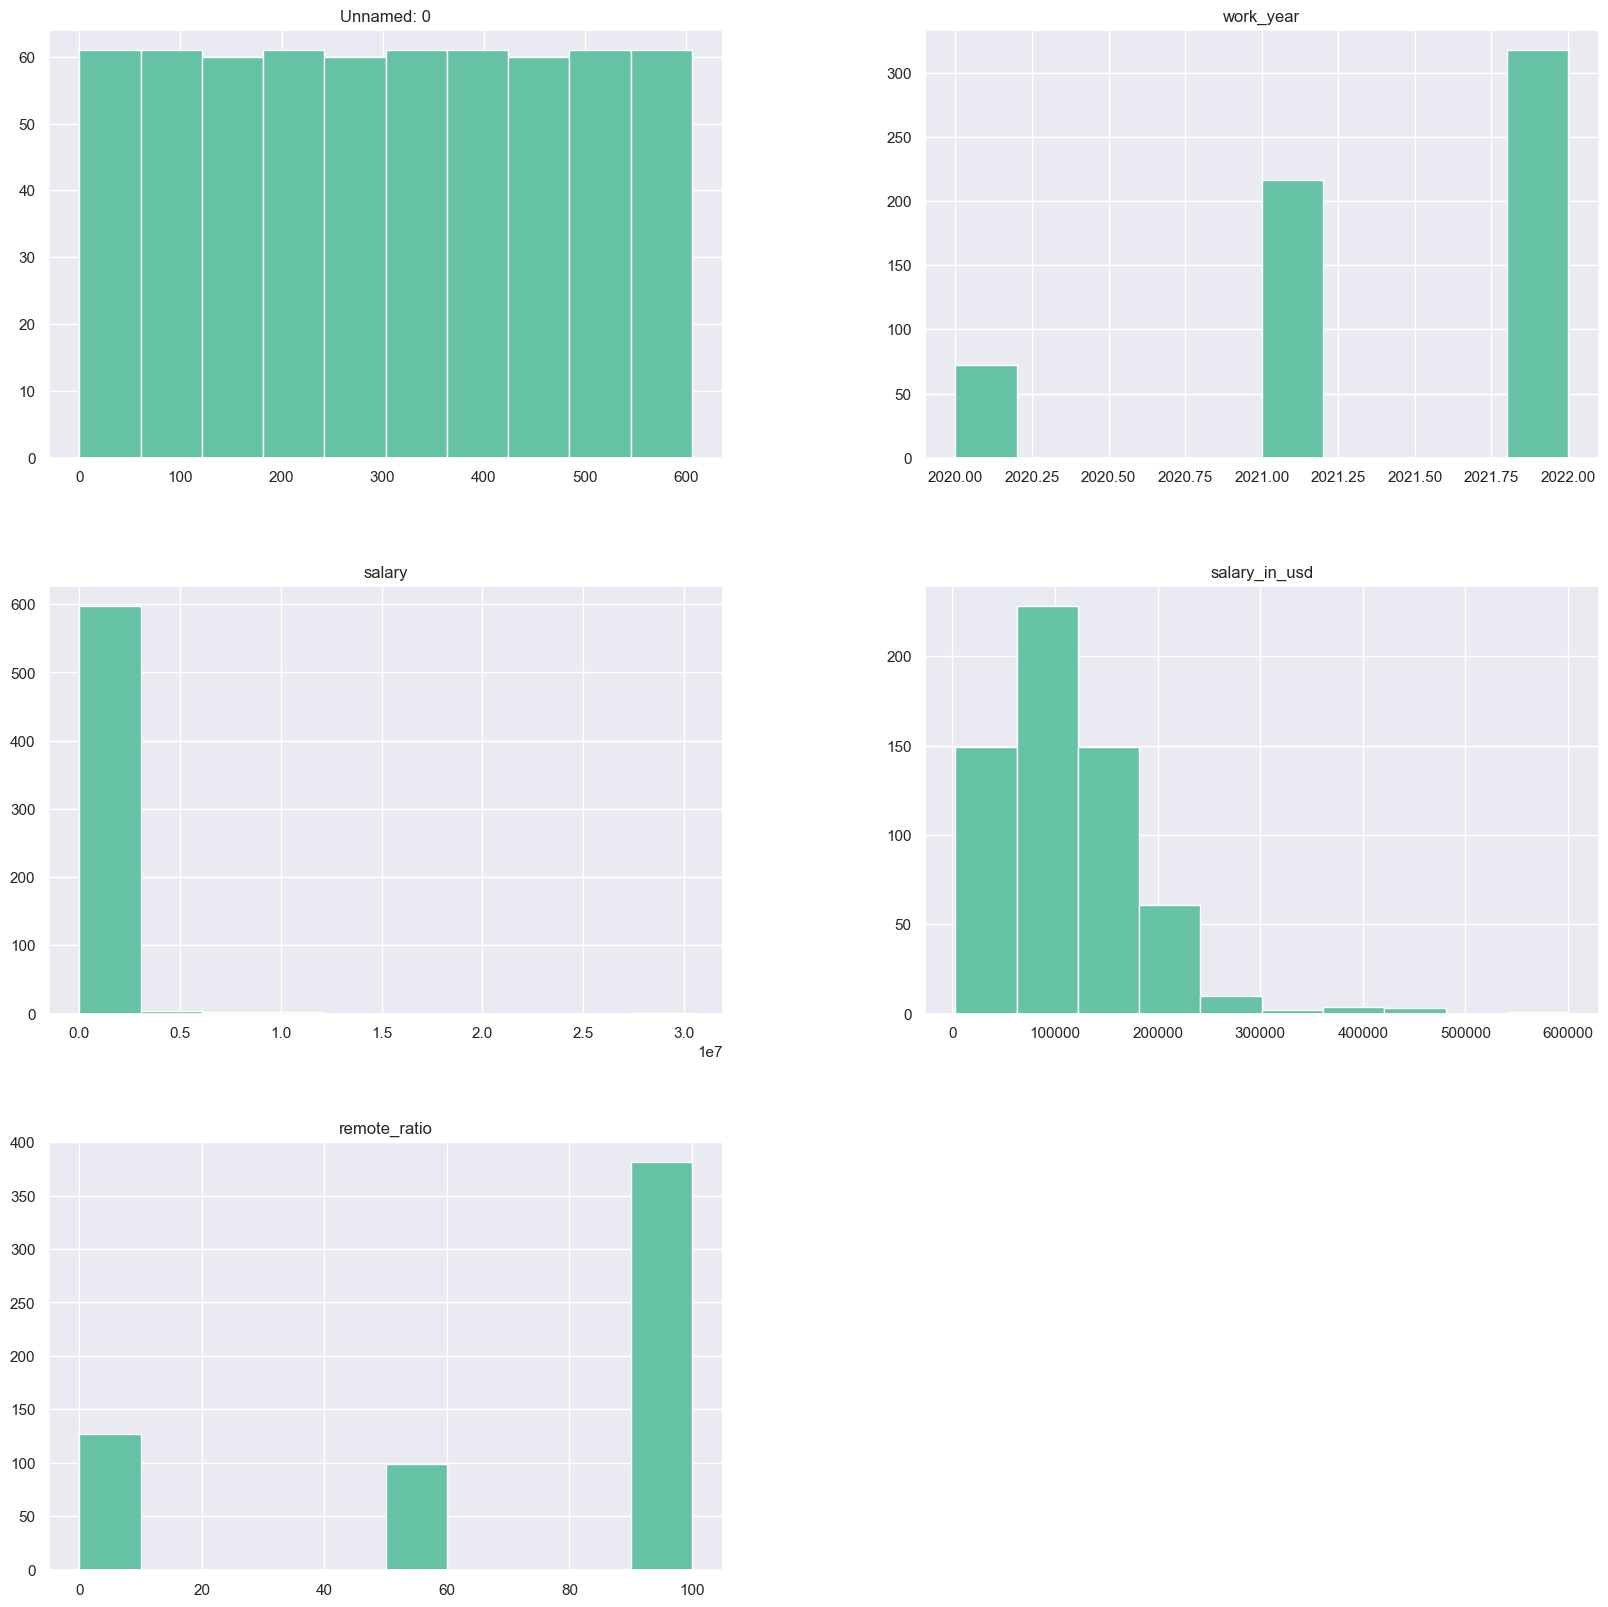

In [12]:
# гистаграммы для числовых признаков
df.hist(figsize=(20, 20))


Были построены пять гистограмм:
**unnamed** - с ровным распределением, который не представляет интереса для анализа и может быть исключен в дальнейшем;
**work_year**, демонстрирующий дискретное распределение с тремя годами на столбчатой диаграмме;
**salary_in_usd**, представляющий информативный признак с распределением, немного скошенным вправо, отличным от нормального;
**remote_ratio**, который также отображен в виде столбчатых диаграмм, но не представляет интереса для нашего анализа.
**salary**- столбчатая диаграмма, соответственно.


## Распределение данных по зарплатам в сфере  Data Scientist (DS)


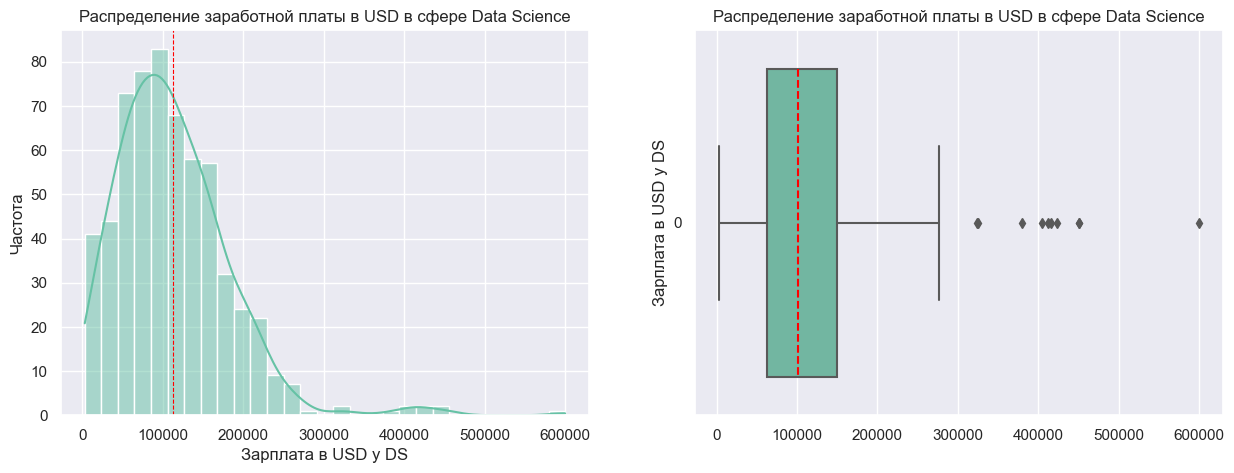

In [14]:
# Посмотрим подчиняются ли зарплаты специалистов DS нормальному распределению
# Визуальный анализ данных
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Зарплата в USD у DS', ylabel='Частота')
axes[0].set_title('Распределение заработной платы в USD в сфере Data Science')
axes[0].axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
sns.boxplot(df['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Зарплата в USD у DS')
axes[1].set_title('Распределение заработной платы в USD в сфере Data Science')
plt.show()


На гистограмме наблюдается распределение, отличное от нормального, с скошенностью вправо и наличием выбросов в области высоких зарплат. На диаграмме размаха (Boxplot) заметно смещение медианы ближе к Q1, чем к Q3, указывающее на смещение распределения вправо, что подтверждается наличием большего количества высоких значений, а также наличием выбросов.

In [15]:
df_agg = df['salary_in_usd'].describe().round(2).to_frame()
df_agg.columns = ['Зарплата в USD у DS']
df_agg

,Зарплата в USD у DS
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


In [16]:
top_salary = df.groupby(['job_title']).count()['salary_in_usd'].sort_values(ascending=False).iloc[:10]
top_salary

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Director of Data Science        7
Name: salary_in_usd, dtype: int64

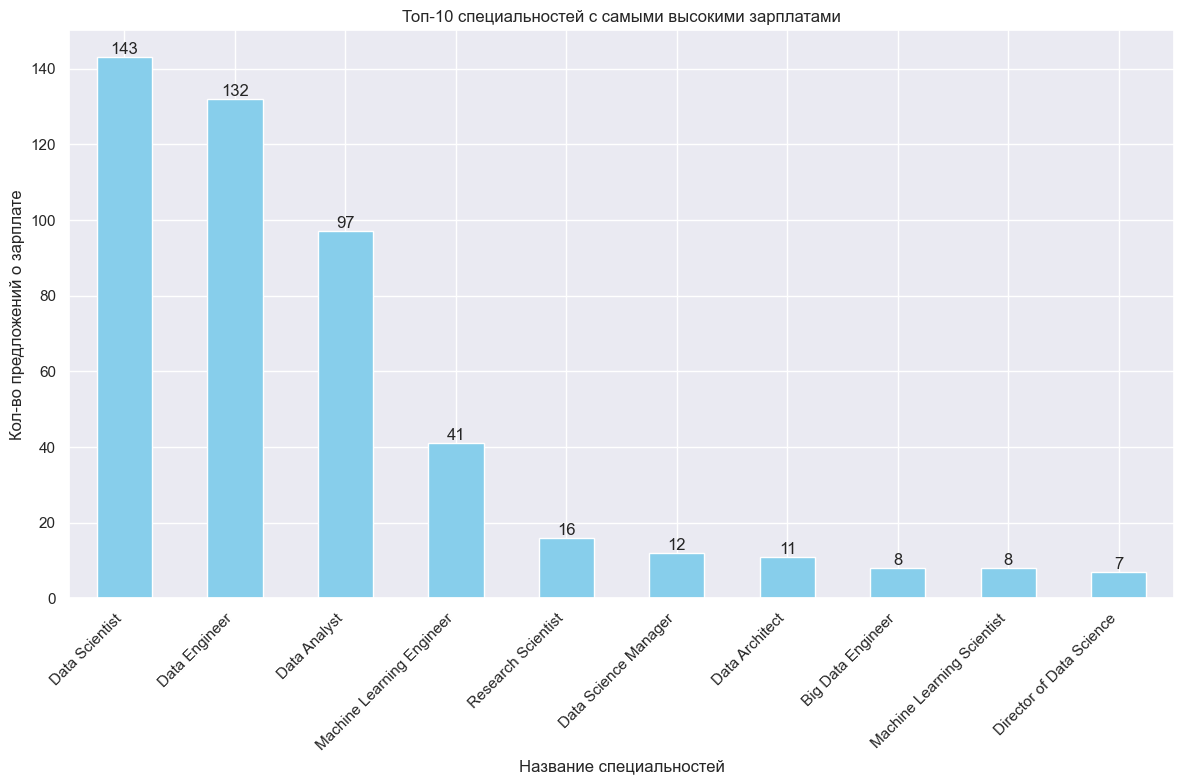

In [18]:
# Создадим гистограмму  (bar chart)

plt.figure(figsize=(12, 8))
bars = top_salary.plot(kind='bar', color='skyblue')

# Добавим метки и значения поверх полос

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')


plt.title('Топ-10 специальностей с самыми высокими зарплатами')
plt.xlabel('Название специальностей')
plt.ylabel('Кол-во предложений о зарплате')
plt.xticks(rotation=45, ha='right')            # Установка заголовка, подписей осей и вращение меток
                                               # на оси x для лучшей читаемости.

# Отображение гистограммы
plt.tight_layout()                       
plt.show()


Этот код создает столбчатую диаграмму, на которой отображены топ-10 профессий с наибольшим количеством предложений о заработной плате. Для более ясного представления числовые значения добавлены в верхнюю часть каждого столбца.


## Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

Средняя зарплата Data Scientist: 108187.83


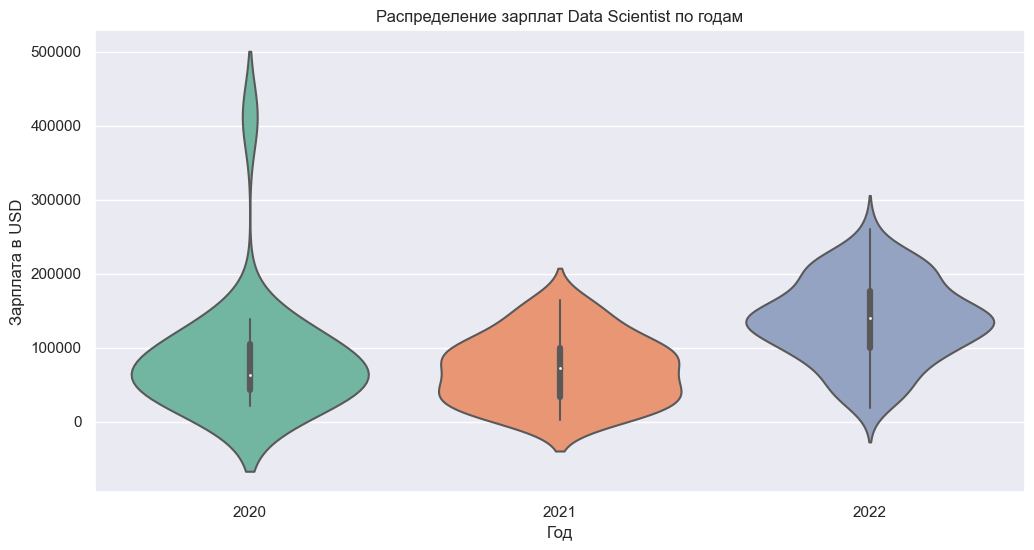

In [19]:
data_scientist_df = df[df['job_title'] == 'Data Scientist']
average_salary = data_scientist_df['salary_in_usd'].mean()

print(f'Средняя зарплата Data Scientist: {average_salary:.2f}')

plt.figure(figsize=(12, 6))
sns.violinplot(x='work_year', y='salary_in_usd', data=data_scientist_df)
plt.title('Распределение зарплат Data Scientist по годам')
plt.xlabel('Год')
plt.ylabel('Зарплата в USD')
plt.show()


Скрипичные диаграммы (violin plots) представляют график, симметричный относительно 2022 года, при этом его форма более широкая по сравнению с двумя предыдущими. Это свидетельствует о том, что зарплаты специалистов в области Data Science в этом диапазоне выше.  Медиана распределения, также указывает на ежегодный рост зарплат, поскольку она постоянно смещается вверх от года к году.


Средняя зарплата Data Scientist: 108187.83


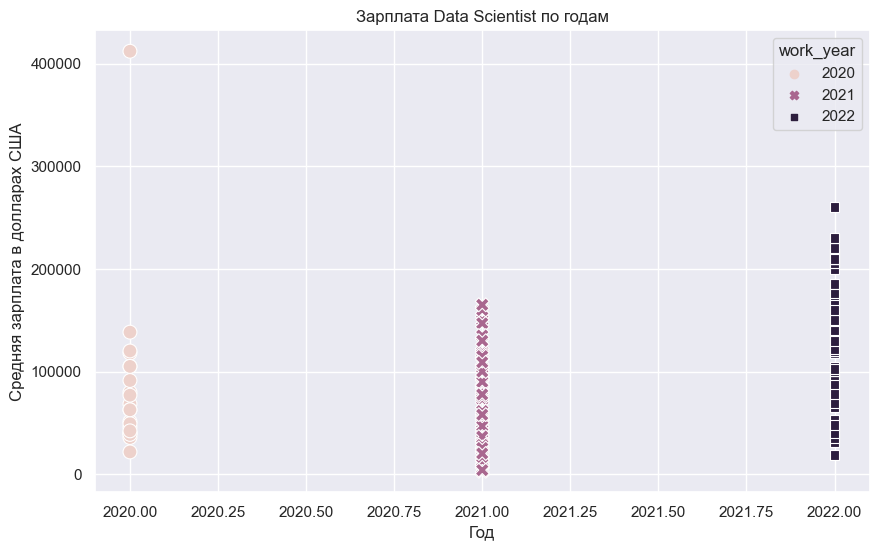

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

data_scientist_df = df[df['job_title'] == 'Data Scientist']

average_salary = data_scientist_df['salary_in_usd'].mean()

print(f'Средняя зарплата Data Scientist: {average_salary:.2f}')


#Точечная диаграмма (Scatter Plot) с линиями трендов

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_scientist_df, x='work_year', y='salary_in_usd', hue='work_year', style='work_year', s=100)
plt.title('Зарплата Data Scientist по годам')
plt.xlabel('Год')
plt.ylabel('Средняя зарплата в долларах США')
plt.grid(True)
plt.show()


Точечные диаграммы (Scatter Plots) показывают равномерное распределение точек с направлением вверх, что указывает на предполагаемый ежегодный рост зарплат. В графике также присутствуют выбросы, которые могут представлять аномально высокие заработные платы.

## Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

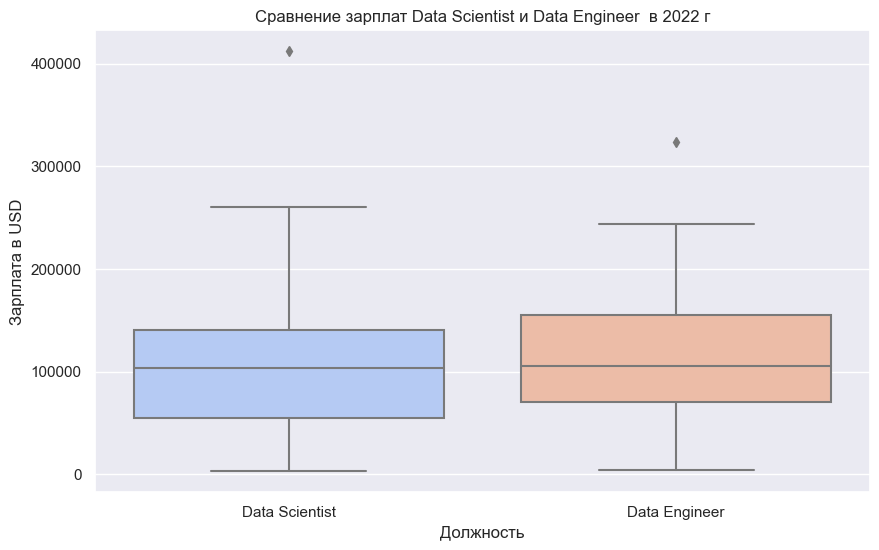

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Группировка данных по годам и расчет средних зарплат
# grouped_data = df[df['job_title']=='Data Scientist'].groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'count', 'std'])

factors = ['Data Scientist', 'Data Engineer']

# Фильтрация данных для выбранных факторов
mask = df['job_title'].isin(factors)
filtered_data = df[mask]

# Визуализация с помощью boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=filtered_data, palette='coolwarm')
plt.title('Сравнение зарплат Data Scientist и Data Engineer  в 2022 г')
plt.xlabel('Должность')
plt.ylabel('Зарплата в USD')
plt.show()




Диаграмма размаха (Boxplot) включает два боксплота, представляющих каждую из профессий. Для Data Scientists (DS) медиана смещена в сторону верхнего квартиля (Q3), и наблюдается один выброс за отметкой в 400000 USD. В случае Data Engineers (DE) медиана находится ближе к нижнему квартилю (Q1), и есть один выброс за пределами 300000 USD. Обе профессии имеют выбросы, что может указывать на наличие высокооплачиваемых позиций или других факторов, влияющих на уровень заработной платы. Медианная зарплата для Data Scientists оказывается немного выше, чем у Data Engineers.


In [48]:
# Группировка данных по годам и расчет средних зарплат
grouped_df_DS = df[df['job_title']=='Data Scientist'].groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'count', 'std'])
grouped_df_DS



,mean,median,count,std
work_year,,,,
2020,85970.523810,62726.0,21,81436.648711
2021,70671.733333,73000.0,45,45422.967568
2022,136172.090909,140000.0,77,54563.084740


In [24]:
grouped_df_DE = df[df['job_title']=='Data Engineer'].groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'count', 'std'])
grouped_df_DE


,mean,median,count,std
work_year,,,,
2020,88162.000000,74130.0,11,46473.115377
2021,83202.531250,78416.5,32,52926.525716
2022,126375.696629,120000.0,89,55954.398677


## Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

                       mean    median  count           std
company_size                                              
L             103313.355556   90734.0     45  71815.176484
M             126380.753247  130000.0     77  56389.528710
S              51925.761905   49268.0     21  33216.289638


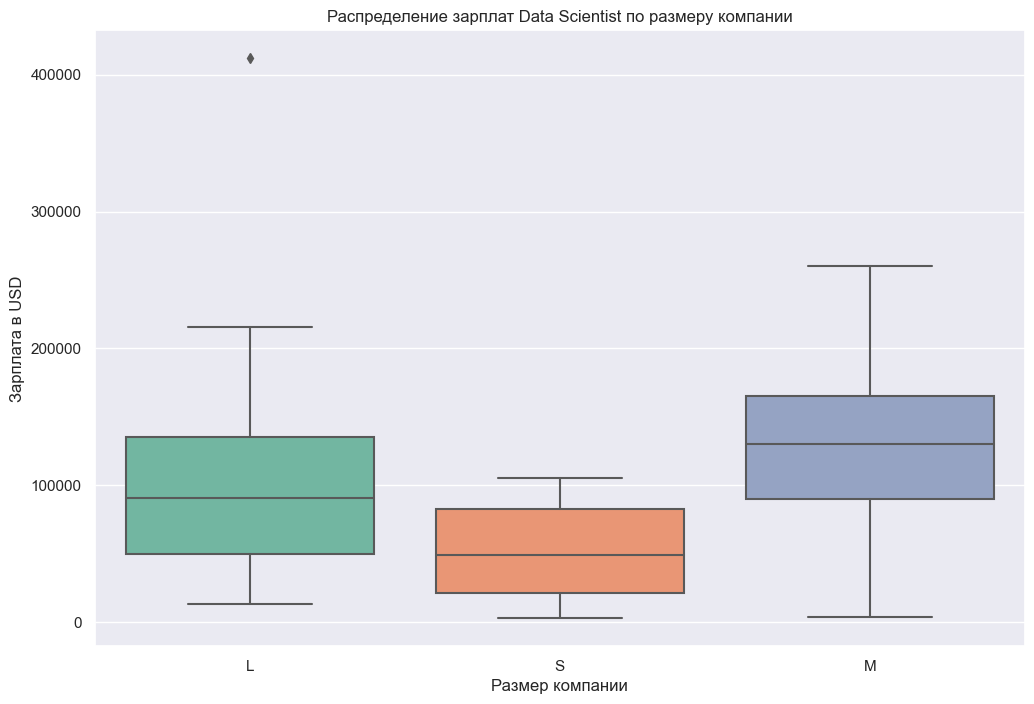

In [49]:
# Строим boxplot для визуализации распределения зарплат DS по размеру компании.

# Группировка данных по размеру компании и расчет средних зарплат
grouped_data = df[df['job_title']=='Data Scientist'].groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'count', 'std'])

# Вывод статистики зарплат  DS по размеру компании
print(grouped_data)

# Построение графика распределения зарплат
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df[df['job_title']=='Data Scientist'])
plt.title('Распределение зарплат Data Scientist по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата в USD')
plt.show()


Медианная зарплата в средних компаниях значительно превышает зарплаты в других компаниях (S;L). Вероятно, такие компании обладают ресурсами для предоставления высоких заработных плат и обладают инновационным потенциалом, привлекая специалистов в области Data Science. Разброс (ширина box) и наличие выбросов также могут указывать на различия в распределении заработных плат в области Data Science в зависимости от размеров компаний.

##  Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

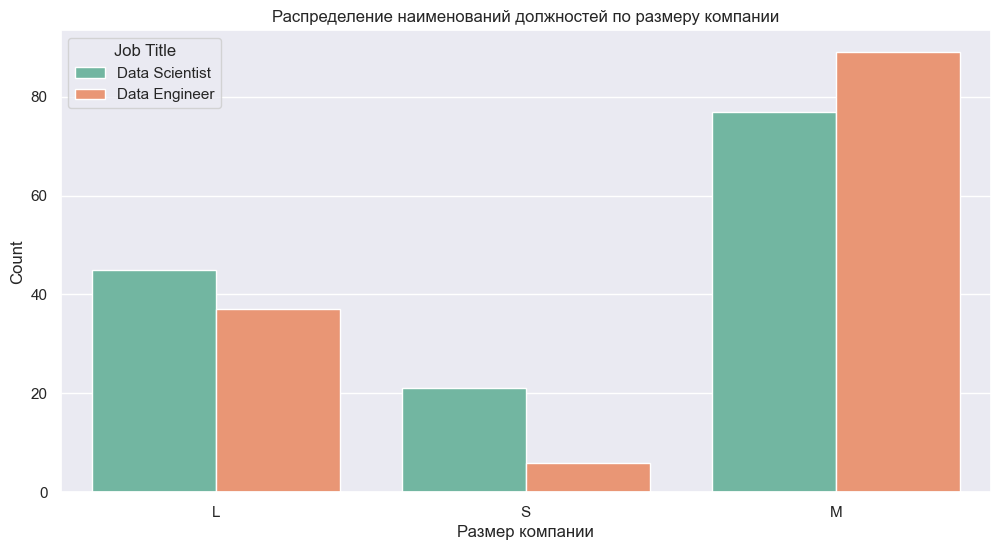

In [27]:
# Фильтрация данных для должностей Data Scientist и Data Engineer
df_filtered = df[df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Визуальный анализ,  чтобы создать графики и увидеть распределение должностей по размеру компаний

import seaborn as sns
import matplotlib.pyplot as plt

#Этот график покажет количество дожностей Data Scientist и Data Engineer в компаниях разных размеров.


plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', hue='job_title', data=df_filtered)
plt.title('Распределение наименований должностей по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Count')
plt.legend(title='Job Title')
plt.show()





Данный график отображает количество Data Scientist и Data Engineer в компаниях различных размеров. В средней компании (М) количество должностей Data Engineer оказывается больше, чем количество Data Scientist, в отличие от компаний L и S. Для проверки случайности или статистической значимости этих различий, планируется провести соответствующие статистические тесты.

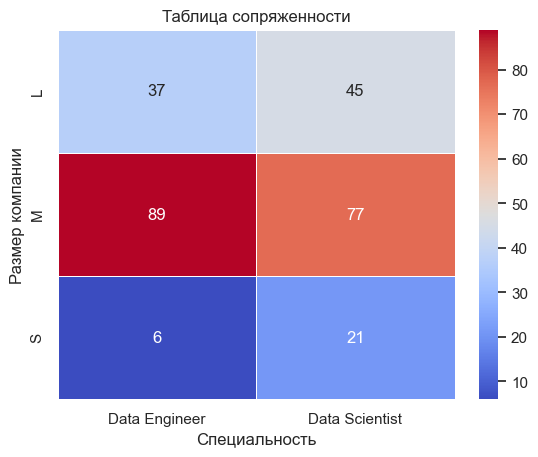

In [28]:
df_filtered = df[df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

cross_tab = pd.crosstab(df_filtered['company_size'], df_filtered['job_title'])

ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Специальность', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()


Связь заметна: количество вакансий на должность Data Engineer в средних компаниях превышает количество вакансий на должность Data Scientist. В то время как в небольших и крупных компаниях наблюдается обратная ситуация.


##### Давайте рассмотрим вопрос об опыте работы и его возможном существенном влиянии на уровень заработной платы.

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
309,309,2022,EX,FT,Data Engineer,242000,USD,242000,US,100,US,M
310,310,2022,EX,FT,Data Engineer,200000,USD,200000,US,100,US,M
482,482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M
483,483,2022,EX,FT,Data Engineer,216000,USD,216000,US,100,US,M


experience_level  EX
job_title           
Data Engineer      4


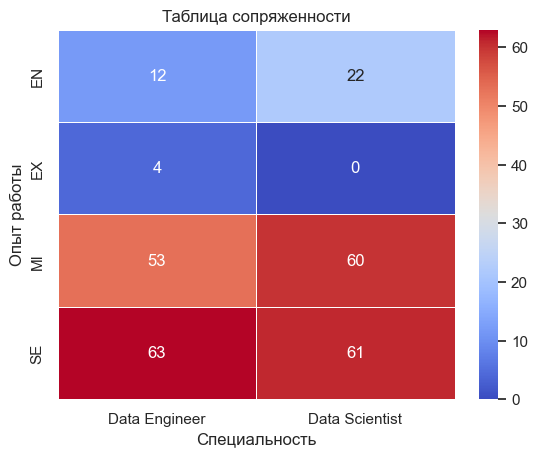

In [50]:
# отобразим строки, где job_title равен 'Data Scientist' или 'Data Engineer',
# и при этом experience_level равен 'EX';

display(df[(df['job_title'].isin(['Data Scientist', 'Data Engineer'])) & (df['experience_level'] == 'EX')])

# Определим условия фильтрации
condition = (df['experience_level'] == 'EX') & (df['job_title'].isin(['Data Scientist', 'Data Engineer']))

# Применим фильтр к DataFrame
filtered_df = df[condition]

# Создадим таблицу сопряженности
cross_table = pd.crosstab(filtered_df['job_title'], filtered_df['experience_level'])

# Выведим таблицу сопряженности
print(cross_table)
df_filtered = df[df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

cross_tab = pd.crosstab(df_filtered['experience_level'], df_filtered['job_title'])

ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Специальность', ylabel='Опыт работы')
plt.title('Таблица сопряженности')
plt.show()




Визуальный анализ подтверждает, что уровень опыта имеет существенное влияние на зарплату. Важно отметить, что для разных специальностей это влияние выглядит идентичным.

Также наблюдается связь между специальностью и требуемым опытом работы. Для специальности Data Scientist уровни MI и SE востребованы примерно в равной степени. В случае Data Engineer опыт EN также требуется минимально, но SE предпочтителен.

Следует отметить, что данные с опытом работы EX (Executive-level/Director) представлены в выборке в минимальном количестве и только для специальности Data Engineer. Этот аспект будет дополнительно рассмотрен на этапе статистического анализа.



# Cтатистическоe тестирование

###### Применим статистическое тестирование, чтобы выяснить, действительно ли различия, которые были обнаружены в данных ( изменения в зарплатах в сфере Data Science), являются реальными и не случайными..


## 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

###### Сформулируем нулевую ($H_0$)  и альтернативную ($H_1$) гипотезы
$H_0$ : Средние зарплаты специалистов Data Scientist не
изменяются от года к году;  

$H_1$ : Существует статистически значимый ежегодный рост
средних зарплат специалистов Data Scientist;

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$) : распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.



In [51]:
#Нормальность: Шапиро-Уилка тест (Shapiro-Wilk test) для проверки каждой группы на нормальность.
#Гомогенность дисперсий: Тест Левена (Levene's test) для проверки равенства дисперсий.

#Давайте сначала проверим нормальность распределения зарплат для каждого из годов.

# Предварительный анализ данных
print(df.groupby('work_year')['salary_in_usd'].describe())

from scipy.stats import f_oneway

# Группируем зарплаты по годам
salaries_2020 = df[df['work_year'] == 2020]['salary_in_usd']
salaries_2021 = df[df['work_year'] == 2021]['salary_in_usd']
salaries_2022 = df[df['work_year'] == 2022]['salary_in_usd']

from scipy.stats import shapiro

# Проверка нормальности распределения зарплат для каждого года

for year in [2020, 2021, 2022]:
    stats, p = shapiro(df[df['work_year'] == year]['salary_in_usd'])
    print(f'Год {year} - статистика Шапиро-Уилка: {stats:.3f}, p-value: {p:.3f}')
    if p > 0.05:
        print(f"Данные за {year} год не отклоняются от нормальности.")
    else:
        print(f"Данные за {year} год отклоняются от нормальности.")
        
       
    
from scipy.stats import levene

# Проверка равенства (гомогенности) дисперсий
levene_stats, levene_p = levene(salaries_2020, salaries_2021, salaries_2022)
print(f'Тест Левена: статистика={levene_stats:.3f}, p-value={levene_p:.3f}')
if levene_p > 0.05:
    print("Дисперсии групп равны.")
else:
    print("Дисперсии групп не равны.")
   


           count           mean           std      min      25%       50%  \
work_year                                                                   
2020        72.0   95813.000000  82831.799222   5707.0  45724.5   75544.0   
2021       217.0   99853.792627  80225.106319   2859.0  50000.0   82528.0   
2022       318.0  124522.006289  58183.647585  10000.0  81666.0  120000.0   

                75%       max  
work_year                      
2020       115526.0  450000.0  
2021       135000.0  600000.0  
2022       160000.0  405000.0  
Год 2020 - статистика Шапиро-Уилка: 0.773, p-value: 0.000
Данные за 2020 год отклоняются от нормальности.
Год 2021 - статистика Шапиро-Уилка: 0.825, p-value: 0.000
Данные за 2021 год отклоняются от нормальности.
Год 2022 - статистика Шапиро-Уилка: 0.962, p-value: 0.000
Данные за 2022 год отклоняются от нормальности.
Тест Левена: статистика=2.239, p-value=0.107
Дисперсии групп равны.


ANOVA результаты: Stat=10.306, p=0.000
Есть статистически значимые различия между группами (принимаем альтернативную гипотезу)


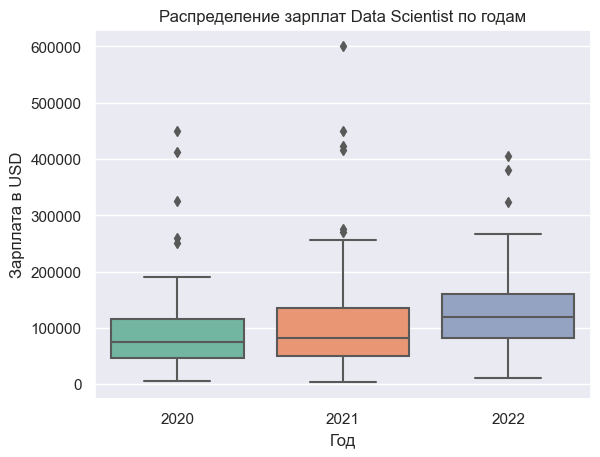

In [52]:
# Статистическое тестирование
# Чтобы выяснить, есть ли статистически значимое различие в зарплатах по годам, можно использовать ANOVA тест

stat, p = f_oneway(salaries_2020, salaries_2021, salaries_2022)
print(('ANOVA результаты: Stat=%.3f, p=%.3f' % (stat, p)))


# Оценка результата
alpha = 0.05
if p < alpha:
    print('Есть статистически значимые различия между группами (принимаем альтернативную гипотезу)')
else:
    print('Нет статистически значимых различий между группами (принимаем нулевую гипотезу)')
   
 
 # Визуализация данных, чтобы построить графики, которые покажут зависимость зарплат от года.

import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация данных по годам
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Распределение зарплат Data Scientist по годам')
plt.xlabel('Год')
plt.ylabel('Зарплата в USD')
plt.show()


Обнаружены статистически значимые различия в средних зарплатах для Data Scientist между годами.
Таким образом, мы можем отклонить нулевую гипотезу, которая предполагает отсутствие различий в заработных платах, и утверждать, что различия между годами действительно существуют.
 

## 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?


###### Сформулируем нулевую ($H_0$)  и альтернативную ($H_1$) гипотезы:

$H_0$ : Зарплаты Data Scientist и Data Engineer в 2022
году равны.

$H_1$ : Зарплаты Data Scientist и Data Engineer в
2022 году различаются.


In [53]:
import numpy as np
from scipy import stats

# Для проверки нормальности распределения можно использовать тест Шапиро-Уилка

# Фильтруем данные для 2022 года и для интересующих нас должностей
data_2022 = df[(df['work_year'] == 2022) & (df['job_title'].isin(['Data Scientist', 'Data Engineer']))]

# Получим зарплаты для каждой профессии
ds_salaries = data_2022[data_2022['job_title'] == 'Data Scientist']['salary_in_usd']
de_salaries = data_2022[data_2022['job_title'] == 'Data Engineer']['salary_in_usd']

# Тест Шапиро-Уилка
ds_normality = stats.shapiro(ds_salaries)
de_normality = stats.shapiro(de_salaries)

print(f"Data Scientist salaries p-value for normality: {ds_normality[1]}")
print(f"Data Engineer salaries p-value for normality: {de_normality[1]}")

# Для проверки гомогенности дисперсий можно использовать тест Левена.

# Тест Левена
levene_stat, levene_p = stats.levene(ds_salaries, de_salaries)

print(f"Levene test p-value for equal variances: {levene_p}")


# Альтернативные тесты
# Если предпосылки t-теста не выполняются, можно использовать непараметрические аналоги,
# такие как тест Манна-Уитни или Краскела-Уоллиса.

# Тест Манна-Уитни
u_stat, u_p = stats.mannwhitneyu(ds_salaries, de_salaries, alternative='less')
print(f"Mann-Whitney U test p-value: {u_p}")



Data Scientist salaries p-value for normality: 0.32688114047050476
Data Engineer salaries p-value for normality: 0.00998825766146183
Levene test p-value for equal variances: 0.6030672437675367
Mann-Whitney U test p-value: 0.9231435265827432


На основе полученных результатов статистических тестов можно сделать следующие выводы:

- Зарплаты Data Scientist близки к нормальному распределению.
- Зарплаты Data Engineer не соответствуют нормальному распределению.
- Не выявлено статистически значимых различий в дисперсии между заработными платами Data Scientist и  Data Engineer.
- Не обнаружено статистически значимых различий в распределении заработных плат между Data Scientist и Data Engineer.

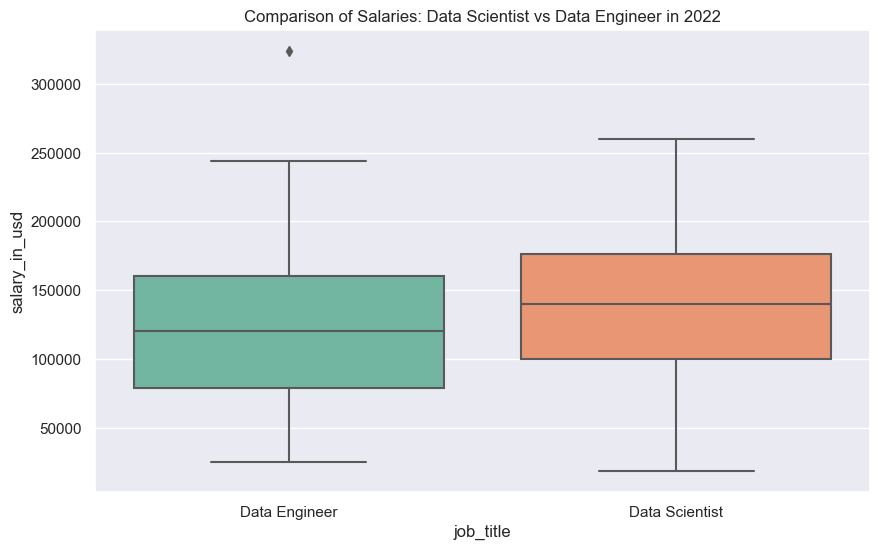

T-statistic: 1.1400206119570786, P-value: 0.25596410324022156
Статистически значимых различий в зарплатах между Data Scientist и Data Engineer в 2022 году не обнаружено.


In [56]:
import numpy as np
from scipy import stats

# Фильтруем данные для 2022 года и для интересующих нас должностей
data_2022 = df[(df['work_year'] == 2022) & (df['job_title'].isin(['Data Scientist', 'Data Engineer']))]

# Визуализируем данные с помощью seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=data_2022)
plt.title('Comparison of Salaries: Data Scientist vs Data Engineer in 2022')
plt.show()


# Можно использовать t-тест для сравнения средних значений двух независимых выборок (зарплаты Data Scientist и Data Engineer).

# Выполним t-тест для проверки статистических различий
# Получим зарплаты для каждой профессии
ds_salaries = data_2022[data_2022['job_title'] == 'Data Scientist']['salary_in_usd']
de_salaries = data_2022[data_2022['job_title'] == 'Data Engineer']['salary_in_usd']

# Проверка предпосылок теста (нормальность распределения, гомогенность дисперсий)
# Если предпосылки нарушены, можно использовать непараметрический тест, например Манна-Уитни
t_stat, p_val = stats.ttest_ind(ds_salaries, de_salaries, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Интерпретация результатов
if p_val < 0.05:
    print("Есть статистически значимые различия в зарплатах между Data Scientist и Data Engineer в 2022 году.")
else:
    print("Статистически значимых различий в зарплатах между Data Scientist и Data Engineer в 2022 году не обнаружено.")

  
    

На этапе визуального анализа было выявлено существенное отличие в данных о зарплате для специальности Data Engineer. В выборке присутствуют 4 записи с высокой зарплатой, при этом для опыта EX позиции в сфере Data Scientist отсутствуют. Эти записи могут искажать общую картину. В связи с этим проведем анализ данных без их участия.

   

In [57]:
# Фильтрация данных для Data Engineer в 2022 году
de_salaries = data_2022[data_2022['job_title'] == 'Data Engineer']

# Исключение данных, где experience_level равен 'EX'
de_salaries = de_salaries.loc[de_salaries['experience_level'] != 'EX', 'salary_in_usd']


# Тест Шапиро-Уилка
ds_normality = stats.shapiro(ds_salaries)
de_normality = stats.shapiro(de_salaries)

print(f"Data Scientist salaries p-value for normality: {ds_normality[1]}")
print(f"Data Engineer salaries p-value for normality: {de_normality[1]}")


# Тест Левена
levene_stat, levene_p = stats.levene(ds_salaries, de_salaries)

print(f"Levene test p-value for equal variances: {levene_p}")


# Альтернативные тесты
# Если предпосылки t-теста не выполняются, можно использовать непараметрические аналоги,
# такие как тест Манна-Уитни или Краскела-Уоллиса.

# Тест Манна-Уитни
u_stat, u_p = stats.mannwhitneyu(ds_salaries, de_salaries, alternative='less')
print(f"Mann-Whitney U test p-value: {u_p}")




Data Scientist salaries p-value for normality: 0.32688114047050476
Data Engineer salaries p-value for normality: 0.06327541917562485
Levene test p-value for equal variances: 0.8086676122174614
Mann-Whitney U test p-value: 0.9733219188876338


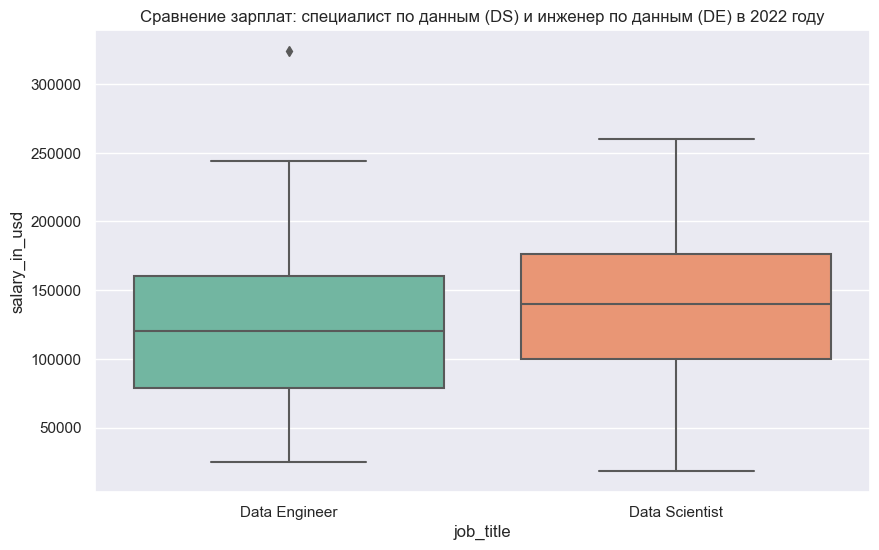


Тест на равенство средних
T-statistic: 1.8726018574853718, P-value: 0.03150808480740474
Есть статистически значимые различия в зарплатах между Data Scientist и Data Engineer в 2022 году.


In [58]:
import numpy as np
from scipy import stats


# Фильтруем данные для 2022 года и для интересующих нас должностей
#data_2022 = df[(df['work_year'] == 2022) & (df['job_title'].isin(['Data Scientist', 'Data Engineer']))]

# Визуализируем данные с помощью seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=data_2022)
plt.title("Сравнение зарплат: специалист по данным (DS) и инженер по данным (DE) в 2022 году")
plt.show()

# Получим зарплаты для каждой профессии
#ds_salaries = data_2022[data_2022['job_title'] == 'Data Scientist']['salary_in_usd']
#de_salaries = data_2022[data_2022['job_title'] == 'Data Engineer']['salary_in_usd']

ds_salaries = data_2022[data_2022['job_title'] == 'Data Scientist']['salary_in_usd']
de_salaries = data_2022[data_2022['job_title'] == 'Data Engineer']

# Исключение данных, где experience_level равен 'EX'
de_salaries = de_salaries.loc[de_salaries['experience_level'] != 'EX', 'salary_in_usd']


# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
t_stat, p_val = stats.ttest_ind(ds_salaries, de_salaries, alternative='greater', equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Интерпретация результатов
if p_val < 0.05:
    print("Есть статистически значимые различия в зарплатах между Data Scientist и Data Engineer в 2022 году.")
else:
    print("Статистически значимых различий в зарплатах между Data Scientist и Data Engineer в 2022 году не обнаружено.")



По результатам теста на равенство средних: T-статистика: 1.8726018574853718 P-значение: 0.031508084807404746
Мы получили статистически значимые различия в зарплатах между Data Scientist и Data Engineer в 2022 году.


## 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

##### Сформулируем нулевую ($H_0$)  и альтернативную ($H_1$) гипотезы:

$H_0$ : Средние зарплаты специалистов Data Scientist не
зависят от размера компании.

$H_1$ : Существует статистически значимая разница в средних
зарплатах специалистов Data Scientist в компаниях
различных размеров.


In [60]:
# Проверка нормальности
# Нормальность данных в каждой группе можно проверить с помощью теста Шапиро-Уилка.

# Перед проведением ANOVA теста, важно проверить выполнение его основных предпосылок,
# таких как нормальность распределения данных и гомогенность дисперсий.

df_ds = df[df['job_title'] == 'Data Scientist']

# Тест Шапиро-Уилка на нормальность
print("Тест Шапиро-Уилка на нормальность")
for size in ['S', 'M', 'L']:
    stat, p = stats.shapiro(df_ds[df_ds['company_size'] == size]['salary_in_usd'])
    print(f"Company Size {size} - Statistics={stat}, p={p}")
    if p > 0.05:
        print("Вероятно,нормальное распределение ")
    else:
        print("Вероятно, не нормальное распределение")
       
    
# Тест Левена на гомогенность дисперсий
stat, p = stats.levene(
    df_ds[df_ds['company_size'] == 'S']['salary_in_usd'],
    df_ds[df_ds['company_size'] == 'M']['salary_in_usd'],
    df_ds[df_ds['company_size'] == 'L']['salary_in_usd']
)
print(f"Тест Левена на равные дисперсии- Statistics={stat}, p={p}")
if p > 0.05:
    print("Дисперсии равны.")
else:
    print("Дисперсии не равны.")
   


Тест Шапиро-Уилка на нормальность
Company Size S - Statistics=0.9368888735771179, p=0.18902742862701416
Вероятно,нормальное распределение 
Company Size M - Statistics=0.9872242212295532, p=0.6389358639717102
Вероятно,нормальное распределение 
Company Size L - Statistics=0.8485125303268433, p=3.353250940563157e-05
Вероятно, не нормальное распределение
Тест Левена на равные дисперсии- Statistics=2.9402127375625775, p=0.05612689353830712
Дисперсии равны.


                       mean    median  count           std
company_size                                              
L             103313.355556   90734.0     45  71815.176484
M             126380.753247  130000.0     77  56389.528710
S              51925.761905   49268.0     21  33216.289638


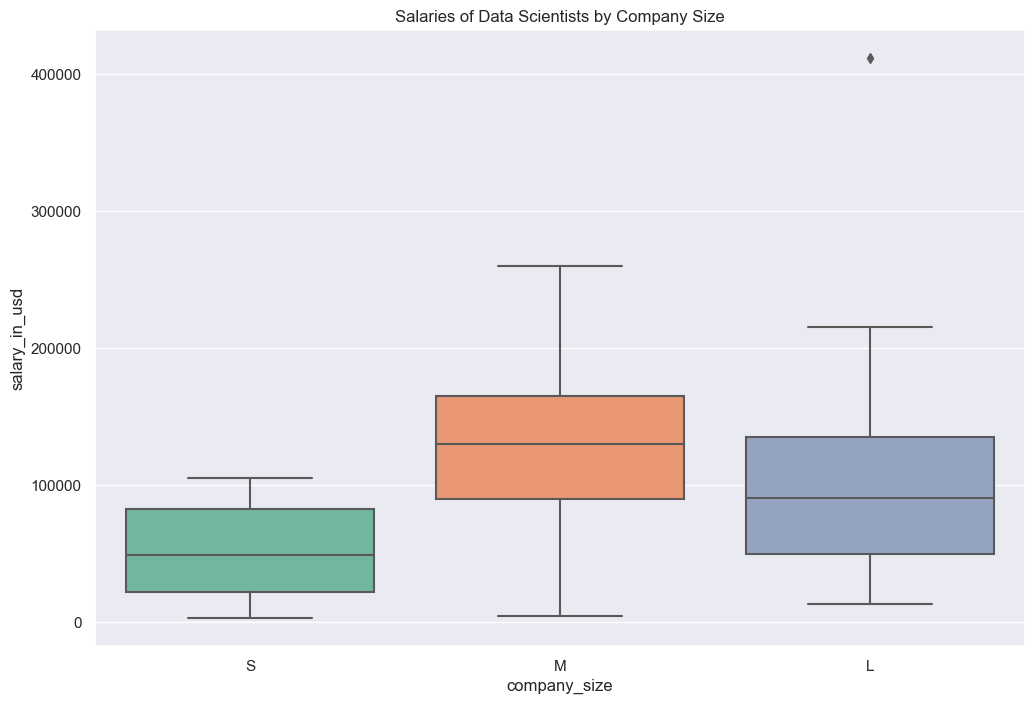

ANOVA результаты: Stat=13.272, p=0.000


In [61]:
# Группировка данных по размеру компании и расчет средних зарплат
grouped_data = df[df['job_title']=='Data Scientist'].groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'count', 'std'])

df_ds = df[df['job_title'] == 'Data Scientist']

# Вывод статистики зарплат по размеру компании
print(grouped_data)

# Визуальный анализ показывающих распределение зарплат в компаниях различного размера;

plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df_ds, order=['S', 'M', 'L'])
plt.title('Salaries of Data Scientists by Company Size')
plt.show()

# Здесь order параметр в sns.boxplot используется, чтобы убедиться,
# что размеры компаний отображаются в логическом порядке.

# Статистическое тестирование
# Для проверки статистических различий можно использовать ANOVA тест.

from scipy import stats

stat, p = f_oneway(
    df_ds[df_ds['company_size'] == 'S']['salary_in_usd'],
    df_ds[df_ds['company_size'] == 'M']['salary_in_usd'],
    df_ds[df_ds['company_size'] == 'L']['salary_in_usd']
)

print(('ANOVA результаты: Stat=%.3f, p=%.3f' % (stat, p)))


Зарплатные данные для компаний размером S и M вероятно имеют нормальное распределение, в то время как данные для компаний размером L, вероятно, не имеют нормальное распределение. На основе теста Левена нет строгих доказательств различий в дисперсиях, хотя p-value близко к уровню значимости 0.05. Мы можем заключить, что зарплата Data Scientists зависит от размера компании, причем наиболее высокие зарплаты в средних компаниях (M)


## 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

##### Сформулируем нулевую ($H_0$)  и альтернативную ($H_1$) гипотезы:

$H_0$ : Нет связи между наличием должностей Data Scientist и
Data Engineer и размером компании.

$H_1$ : Существует связь между наличием должностей Data
Scientist и Data Engineer и размером компании.


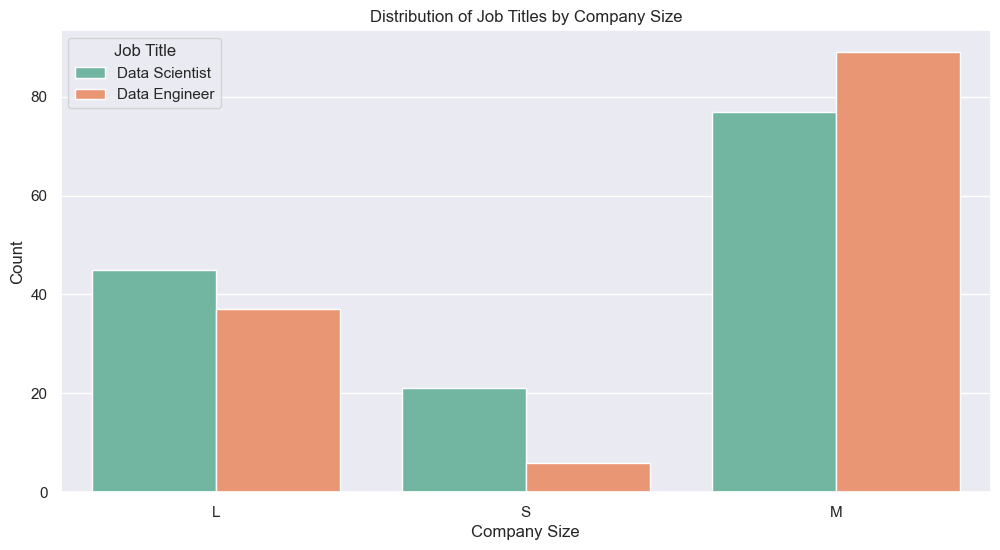

Chi-squared Test statistic: 9.556581548206584
P-value: 0.008410361897604775


In [62]:
# Для проверки статистической связи между должностью и размером компании можно использовать хи-квадрат тест независимости.
# Проверка на нормальность и равенство дисперсий не требуется.

# Фильтрация данных для должностей Data Scientist и Data Engineer
df_filtered = df[df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Визуальный анализ, чтобы создать графики и увидеть распределение должностей по размеру компаний.

# Этот график покажет количество Data Scientists и Data Engineers в компаниях разных размеров.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', hue='job_title', data=df_filtered)
plt.title('Distribution of Job Titles by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.legend(title='Job Title')
plt.show()

# Статистическое тестирование

# хи-квадрат  тест для анализа взаимосвязи между двумя  категориальными переменными

from scipy.stats import chi2_contingency

# Создание таблицы сопряженности
cross_table = pd.crosstab(df_filtered['company_size'], df_filtered['job_title'])
cross_table


# Применение теста хи-квадрат
chi2, p, dof, expected = chi2_contingency(cross_table)

print(f"Chi-squared Test statistic: {chi2}")
print(f"P-value: {p}")



In [63]:
# Создание таблицы сопряженности
cross_table = pd.crosstab(df_filtered['job_title'], df_filtered['company_size'])
cross_table


company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


Так как P-значение меньше 0.05, мы отвергаем нулевую гипотезу и делаем вывод о наличии статистически значимой связи между должностями (DS и DE) и размером компаний. Этот результат считается статистически значимым и не является случайным.

Итак, у нас есть статистически значимая связь между должностями Data Scientist (DS) и Data Engineer (DE) и размером компаний.


# Дополнительное исследование

### Проведём визуальный анализ и статистическое тестирование о влиянии  опыта работы  (experience_level ) на заработную плату специалистов в Data Science. .

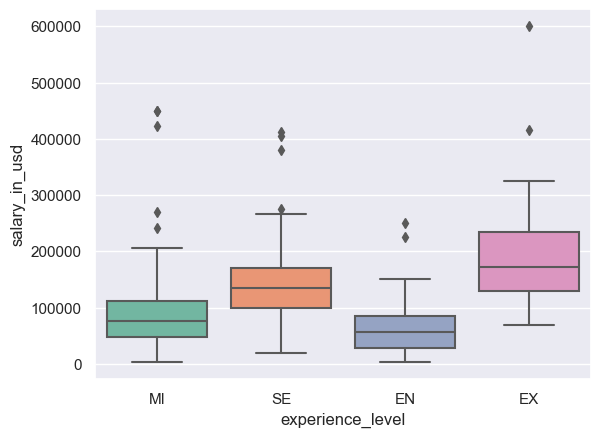

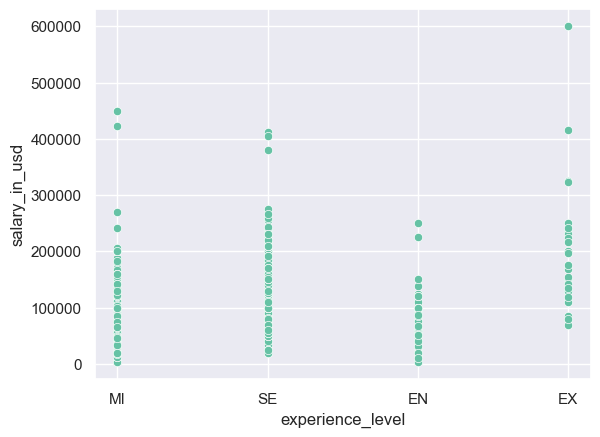

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [64]:
# Рассмотрим влияние опыта работы на уровень заработной платы.
# Стоит ли ожидать существенного влияния опыта на уровень зарплаты?

# Boxplot для визуализации различий в зарплатах на разных уровнях опыта
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.show()

# Scatterplot для визуализации соотношения между уровнем опыта и зарплатой
sns.scatterplot(x='experience_level', y='salary_in_usd', data=df)
plt.show()

# выведем список уникальных значений
df['experience_level'].nunique()

# какова статистика распределения этих уникальных значений?(сколько каких значений)
df['experience_level'].value_counts(normalize=False).head(5)

#### Cтатистическоe тестирование
##### Сформулируем нулевую ($H_0$)  и альтернативную ($H_1$) гипотезы:

$H_0$ : Средние заработные платы специалистов в Data Science не зависят от уровня опыта работы.

$H_1$ : Существует статистически значимая зависимость между уровнем опыта работы и заработной платой специалистов в Data Science.


In [65]:
# Проверка на нормальность распределения для каждой группы
for name, group in df.groupby('experience_level'):
    stat, p = stats.shapiro(group['salary_in_usd'])
    print(f'Group {name}, Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p:.3f}')

# Проверка на гомогенность  ( равенство ) дисперсий
grouped_data = [group['salary_in_usd'] for name, group in df.groupby('experience_level')]
stat, p = stats.levene(*grouped_data)
print(f'Levene’s Test: Statistics={stat:.3f}, p-value={p:.3f}')



Group EN, Shapiro-Wilk Test: Statistics=0.890, p-value=0.000
Group EX, Shapiro-Wilk Test: Statistics=0.837, p-value=0.001
Group MI, Shapiro-Wilk Test: Statistics=0.797, p-value=0.000
Group SE, Shapiro-Wilk Test: Statistics=0.949, p-value=0.000
Levene’s Test: Statistics=7.645, p-value=0.000


 Учитывая нарушение предпосылок (ненормальность распределения и неравенство дисперсий), рекомендуется использовать непараметрические методы, например, тест Краскела-Уоллиса (аналог ANOVA для ненормальных данных).


In [66]:
from scipy.stats import kruskal

# Подготовка данных: список зарплат для каждого уровня опыта
salary_data = [group['salary_in_usd'].values for name, group in df.groupby('experience_level')]

# Выполнение теста Краскела-Уоллиса
stat, p = kruskal(*salary_data)

print(f"Kruskal-Wallis H-test test statistic: {stat:.3f}, p-value: {p:.3f}")

# Вывод на основе полученного p-value
if p < 0.05:
    print("Есть статистически значимые различия между группами.")
else:
    print("Нет статистически значимых различий между группами.")



Kruskal-Wallis H-test test statistic: 190.111, p-value: 0.000
Есть статистически значимые различия между группами.


Результаты теста Краскела-Уоллиса:

Статистика теста: 190.111
P-значение: 0.000

Так как P-значение меньше 0.05, мы отвергаем нулевую гипотезу.
Это свидетельствует о статистически значимых различиях между группами. Таким образом, можно сделать вывод о существовании статистически значимой зависимости между уровнем опыта работы и заработной платой специалистов в области Data Science.


###  Проведём визуальный анализ и статистическое тестирование о влиянии  "Тип трудоустройства"  (  employment_type )    на заработную плату salary_in_usd специалистов в Data Science

##### Сформулируем нулевую ($H_0$)  и альтернативную ($H_1$) гипотезы:

$H_0$ : Средние заработные платы специалистов в Data Science не зависят от типа трудоустройства.

$H_1$ : Существует статистически значимая зависимость между уровнем типа трудоустройства и заработной платой специалистов в Data Science.


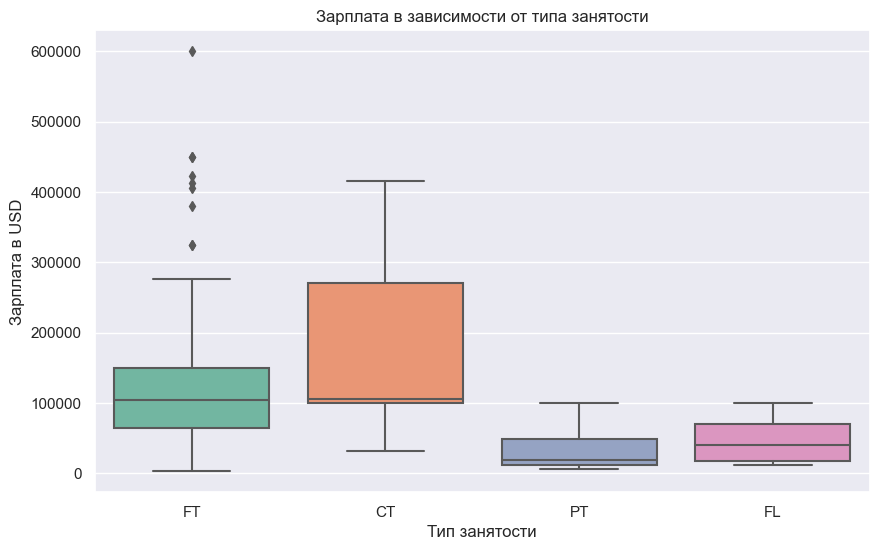

Kruskal-Wallis test statistic: 22.419, p-value: 0.000


In [67]:
# Визуализация зарплат в зависимости от типа занятости
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Зарплата в зависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Зарплата в USD')
plt.show()

# Статистическое тестирование
# Так как наши данные категориальные и мы не можем быть уверены в нормальности распределения зарплат,
# используем непараметрический тест Краскела-Уоллиса.

# Статистическое сравнение зарплат по типам занятости
salary_groups = [group['salary_in_usd'].values for name, group in df.groupby('employment_type')]
stat, p = kruskal(*salary_groups)

print(f"Kruskal-Wallis test statistic: {stat:.3f}, p-value: {p:.3f}")


Так как P-значение меньше 0.05, мы отвергаем нулевую гипотезу о равенстве зарплат для всех групп. Это подтверждает наличие статистически значимых различий между группами. Таким образом, можно утверждать, что тип занятости оказывает статистически значимое влияние на заработную плату специалистов в области Data Science.



## Итоговые результаты исследования



1. Наблюдается ежегодный рост зарплат у специалистов Data Scientist, и различия в зарплатах между годами являются статистически значимыми. Иссключениями являються вакансии, требующие опыт работы на уровне EX.

2. В 2022 году зарплаты Data Scientist выше, чем у Data Engineer, и эти различия статистически значимы( они не случайны).

3. Зарплаты Data Scientist зависят от размера компании, с более высокими значениями в средних компаниях.

4. Наблюдается статистически значимая связь между должностями Data Scientist и Data Engineer и размером компании, и эта связь не случайна.
